# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [1]:
import pandas as pd

cadastro_clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';')
cadastro_funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';')
base_servicos_prestados_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')

lista_df = [cadastro_clientes_df, cadastro_funcionarios_df, base_servicos_prestados_df]

for itens in lista_df:
    display(itens)

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955,4382,242,"719,04",Diretor,Operações
1,2,C,João Haddad,5404,2702,"1080,8",154,"574,56",Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,"5396,5","2158,6",242,"514,08",Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024,"809,6",198,"796,32",Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298,"4919,2",242,"561,12",Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539,"1015,6",308,"665,28",Estagiário,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [19]:
#1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?
#Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

colunas_dinheiro_funcionarios = cadastro_funcionarios_df[['Salario Base', 'Impostos', 'Beneficios']]

colunas_dinheiro_funcionarios = colunas_dinheiro_funcionarios.apply(pd.to_numeric, errors='coerce').fillna(0)

total_salarios_funcionarios = colunas_dinheiro_funcionarios.sum(axis=1)

cadastro_funcionarios_df['Total por funcionário'] = total_salarios_funcionarios

display(cadastro_funcionarios_df)

total_gasto = cadastro_funcionarios_df['Total por funcionário'].sum()

print(f'O total gasto com salário de funcionários pela empresa foi de: R${total_gasto:,}')

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salario Total,Total por funcionário
0,1,C,Gabriel Mesquita,21910,10955,4382,242,"719,04",Diretor,Operações,37247.0,37247.0
1,2,C,João Haddad,5404,2702,"1080,8",154,"574,56",Estagiário,Logística,NaN,8106.0
2,3,C,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Estagiário,Administrativo,NaN,24099.0
3,4,C,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Analista,Administrativo,NaN,25566.0
4,5,C,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Analista,Administrativo,NaN,7647.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,"5396,5","2158,6",242,"514,08",Analista,Logística,NaN,10793.0
110,144,S,Lucas Brum Pereira,4048,2024,"809,6",198,"796,32",Estagiário,Comercial,NaN,6072.0
111,148,S,Caio Stellet,24596,12298,"4919,2",242,"561,12",Analista,Administrativo,NaN,36894.0
112,149,C,Fernanda Rocha,5078,2539,"1015,6",308,"665,28",Estagiário,Comercial,NaN,7617.0


O total gasto com salário de funcionários pela empresa foi de: R$1,982,787.0


In [ ]:
cadastro_funcionarios_df['Salario Total'] = (cadastro_funcionarios_df['Salario Base'] + cadastro_funcionarios_df['Impostos'] + cadastro_funcionarios_df['Beneficios'])
print(cadastro_funcionarios_df['Salario Base'].sum())

In [2]:
#2. Qual foi o faturamento da empresa?
#Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos

base_servicos_prestados_df = pd.DataFrame(base_servicos_prestados_df)

tempo_contrato = base_servicos_prestados_df[['Tempo Total de Contrato (Meses)']]

cadastro_clientes_df = cadastro_clientes_df.merge(tempo_contrato, left_index=True, right_index=True)

cadastro_clientes_df['Faturamento Total por Serviço'] = cadastro_clientes_df['Valor Contrato Mensal'] * cadastro_clientes_df['Tempo Total de Contrato (Meses)']

display(cadastro_clientes_df)

faturamento_total_empresa = sum(cadastro_clientes_df['Faturamento Total por Serviço'])

print(f'O faturamento total da empresa foi de R${faturamento_total_empresa:,}')


,ID Cliente,Cliente,Valor Contrato Mensal,Tempo Total de Contrato (Meses),Faturamento Total por Serviço
0,1,Teixeira Gonçalves,540,14,7560
1,2,Souza Santos,1260,12,15120
2,3,Emídio Alves,3195,14,44730
3,4,Santos Costa,2520,8,20160
4,5,Do Monteiro,3510,8,28080
...,...,...,...,...,...
232,233,Clara Bueno,2070,4,8280
233,234,Lucas Dantas,810,8,6480
234,235,Regina Sousa,3645,6,21870
235,236,Maria Vieira,1485,14,20790


O faturamento total da empresa foi de R$5,628,330


In [4]:
faturamentos_df = base_servicos_prestados_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(cadastro_clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print(faturamentos_df['Faturamento Total'].sum())

4122450


In [17]:
# 3. Qual o % de funcionários que já fechou algum contrato?
#Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
#. Na base de funcionários temos uma lista com todos os funcionários
#. Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
#. Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.
#Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.
#Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA
 
Qtde_Funcionarios_Fecharam_Servico = len(base_servicos_prestados_df['ID Funcionário'].unique())
Qtde_Funcionarios_Totais = len(cadastro_funcionarios_df['ID Funcionário'])

porcentagem_funcionarios_fechou_contrato = Qtde_Funcionarios_Fecharam_Servico / Qtde_Funcionarios_Totais

print(f'A porcentagem de funcionários que já fecharam algum serviço é de {porcentagem_funcionarios_fechou_contrato:.2%}')


A porcentagem de funcionários que já fecharam algum serviço é de 86.84%


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64

<Axes: ylabel='count'>

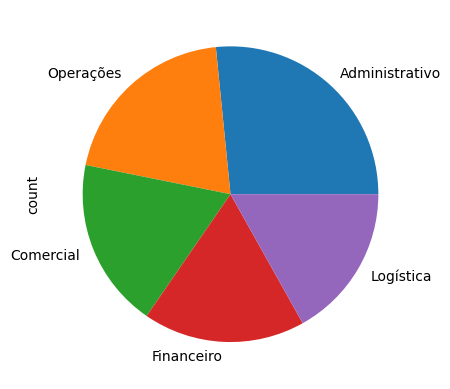

In [10]:
#4. Calcule o total de contratos que cada área da empresa já fechou

contratos_area_df = base_servicos_prestados_df[['ID Funcionário']].merge(cadastro_funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
total_contratos_por_area = contratos_area_df['Area'].value_counts()

display(total_contratos_por_area)
total_contratos_por_area.plot(kind='pie')

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64

<Axes: xlabel='Area'>

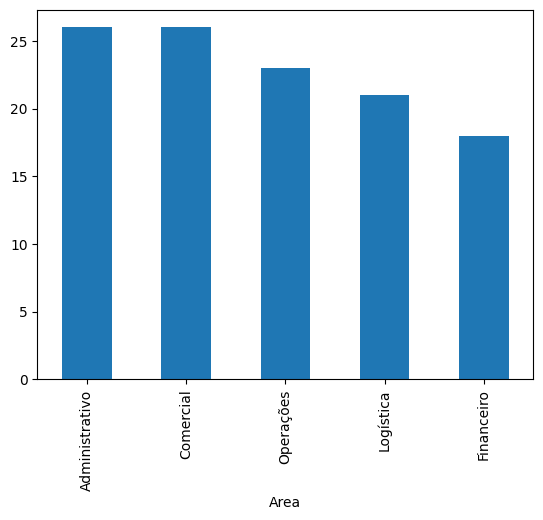

In [9]:
#5. Calcule o total de funcionários por área

funcionarios_areas = cadastro_funcionarios_df['Area'].value_counts()
display(funcionarios_areas)
funcionarios_areas.plot(kind='bar')

In [14]:
#6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
#Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

media_faturamento_mensal = cadastro_clientes_df['Valor Contrato Mensal'].mean()
print(f'O valor da média mensal de faturamento é R${media_faturamento_mensal:,.2f}')

O valor da média mensal de faturamento é R$2,502.56
